In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/My Drive/Veritas AI/'

In [4]:
#expr_commonscore.to_csv('/content/drive/My Drive/Veritas AI/expression_commonscore_data.csv')
df_expr_commonscore= pd.read_csv(data_path+'expression_commonscore_data.csv')
df_expr_commonscore.set_index('gene_id', inplace=True)

In [5]:
expr_final=pd.read_csv('/content/drive/My Drive/Veritas AI/expression_final_filtered_data.csv')

In [6]:
# ceradsc_row_df.columns = ceradsc_row_df.columns + "_commscore"
y = expr_final['ceradsc']
X= df_expr_commonscore.transpose() #best varience filter is 0.06
#X=expr_final.drop(columns=['ceradsc']) #original expression data # varience filter should be 0.15
X.index=y.index
X=X.dropna(axis=1)

In [7]:
y.shape

(635,)

In [8]:
var_commonscore=np.var(X.to_numpy(), axis=0) #https://www.geeksforgeeks.org/numpy-var-in-python/
mask = var_commonscore > 0.01
#var_commonscore[mask] #get rid of genes that have a low expression value varience. Leave the remaining genes here.
X=X.loc[:,mask]

In [9]:
X

gene_id,ENSG00000136698,ENSG00000171564,ENSG00000171564,ENSG00000163898,ENSG00000163898,ENSG00000163898,ENSG00000184349,ENSG00000089012,ENSG00000089012,ENSG00000089012,...,ENSG00000105290,ENSG00000105290,ENSG00000105290,ENSG00000105552,ENSG00000154096,ENSG00000197565,ENSG00000001626,ENSG00000001626,ENSG00000001626,ENSG00000259384
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.105615,0.057461,0.012816,0.420389,0.092566,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.664561,0.164835,0.130013,0.564428,0.421564,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.748982,0.262963,0.439936,0.736905,0.553814,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.676147,0.248594,0.081633,0.603812,0.564563,1.0,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.259560,0.067733,0.094461,0.446545,0.194040,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.728895,0.202878,0.061230,0.513248,0.574594,1.0,1.0,1.0,1.0,0.0
631,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.734567,0.124570,0.186955,0.647876,0.634440,1.0,1.0,1.0,1.0,0.0
632,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.662084,0.202259,0.424621,0.559033,0.526319,1.0,1.0,1.0,1.0,0.0
633,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.186721,0.087160,0.029519,0.581184,0.171139,1.0,1.0,1.0,0.0,1.0


In [10]:
X.shape

(635, 1098)

In [11]:
X.columns.to_list()

['ENSG00000136698',
 'ENSG00000171564',
 'ENSG00000171564',
 'ENSG00000163898',
 'ENSG00000163898',
 'ENSG00000163898',
 'ENSG00000184349',
 'ENSG00000089012',
 'ENSG00000089012',
 'ENSG00000089012',
 'ENSG00000185313',
 'ENSG00000185313',
 'ENSG00000185313',
 'ENSG00000067596',
 'ENSG00000073008',
 'ENSG00000116690',
 'ENSG00000103522',
 'ENSG00000103522',
 'ENSG00000171119',
 'ENSG00000171119',
 'ENSG00000070886',
 'ENSG00000070886',
 'ENSG00000035403',
 'ENSG00000143119',
 'ENSG00000173482',
 'ENSG00000108821',
 'ENSG00000173372',
 'ENSG00000164406',
 'ENSG00000164406',
 'ENSG00000164406',
 'ENSG00000164406',
 'ENSG00000204577',
 'ENSG00000197019',
 'ENSG00000197019',
 'ENSG00000171509',
 'ENSG00000171509',
 'ENSG00000138449',
 'ENSG00000151617',
 'ENSG00000102181',
 'ENSG00000239961',
 'ENSG00000108691',
 'ENSG00000180772',
 'ENSG00000180772',
 'ENSG00000123496',
 'ENSG00000123496',
 'ENSG00000011028',
 'ENSG00000044524',
 'ENSG00000044524',
 'ENSG00000044524',
 'ENSG00000204174',


MODEL BEGINS

In [12]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn
!pip install tensorflow==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [13]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
smote = SMOTE(sampling_strategy='minority', random_state=42)
scaler = StandardScaler()


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test) #Data leakage risk: If you apply fit_transform separately on X_test, it learns the mean and standard deviation from the test data, which should be treated as unseen.

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Maintain 95% of variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Text(0.5, 1.0, 'Gene-wise mean vs variance')

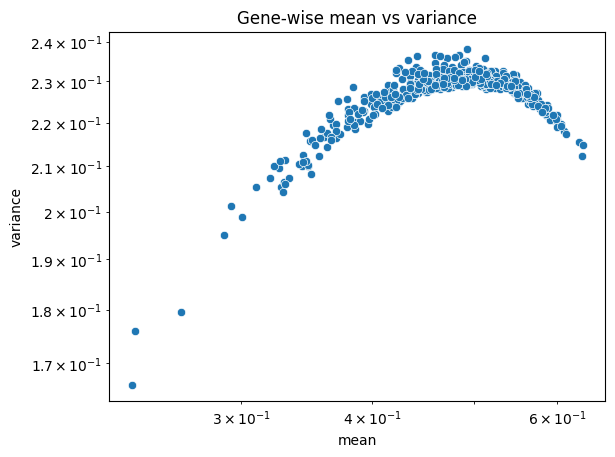

In [55]:
fig, ax = plt.subplots()

stats = pd.DataFrame({'mean': X.mean(axis = 1), 'variance': X.var(axis = 1)})
sns.scatterplot(data = stats, x = 'mean', y = 'variance', ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Gene-wise mean vs variance')


In [56]:
from sklearn.utils.class_weight import compute_class_weight
class_weights=compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1., 1.])

In [19]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [20]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils.class_weight import compute_class_weight
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# X_train_combined = X_train
# X_test_combined = X_test
# # Compute class weights for imbalance
# class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))

# # Create a simpler model with fewer layers and neurons
# model = Sequential([
#     Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4), input_shape=(X_train_combined.shape[1],)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(1, activation='softmax')  # Binary classification
# ])

# # Compile the model with Adam optimizer and smaller learning rate
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy'])

# # Cross-validation setup
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Track metrics for each fold
# precisions = []
# recalls = []
# f1_scores = []
# roc_aucs = []


# # Train the model
# model.fit(X_train_fold, y_train_fold,
#           epochs=50,
#           batch_size=16,
#           validation_data=(X_val_fold, y_val_fold),
#           class_weight=class_weight_dict,
#           verbose=0)  # Silence training output for brevity

# # Predict on the validation set
# y_val_pred = model.predict(X_val_fold)
# y_val_pred = (y_val_pred > 0.5).astype(int)  # Binarize predictions

# # Compute metrics
# precisions.append(precision_score(y_val_fold, y_val_pred))
# recalls.append(recall_score(y_val_fold, y_val_pred))
# f1_scores.append(f1_score(y_val_fold, y_val_pred))
# roc_aucs.append(roc_auc_score(y_val_fold, y_val_pred))

# # Average metrics across all folds
# print(f"Average Precision: {np.mean(precisions):.4f}")
# print(f"Average Recall: {np.mean(recalls):.4f}")
# print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
# print(f"Average AUC-ROC: {np.mean(roc_aucs):.4f}")

# # Final test set evaluation
# test_loss, test_acc = model.evaluate(X_test_combined, y_test)
# print(f"Test Accuracy: {test_acc:.4f}")

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

X_train_combined = X_train
X_test_combined = X_test
# Compute class weights for imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Create a simpler model with fewer layers and neurons
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4), input_shape=(X_train_combined.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with Adam optimizer and smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train,
          epochs=10,
          batch_size=8,
          validation_split=0.2,
          class_weight=class_weight_dict,
          verbose=0)  # Silence training output for brevity

y_pred=model.predict(X_test_combined) #probability outputed
y_pred=(y_pred>0.5).astype(int) #binarizes the outcome

# Final test set evaluation
print(f"Test Accuracy: {accuracy_score(y_test,y_pred):.4f}")
print(f" F1 Score (Weighted): {f1_score(y_test,y_pred):.4f}\n")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred):.4f}\n")



4/4 [==============================] - 0s 3ms/step
Test Accuracy: 0.5433
 F1 Score (Weighted): 0.4528

AUC-ROC Score: 0.5469



In [38]:
print(f"Raw SHAP values type: {type(shap_values)}")
print(f"Raw SHAP values length (if list): {len(shap_values) if isinstance(shap_values, list) else 'Not a list'}")
print(f"Raw SHAP values shape: {np.array(shap_values).shape}")


Raw SHAP values type: <class 'numpy.ndarray'>
Raw SHAP values length (if list): Not a list
Raw SHAP values shape: (100, 175, 1)


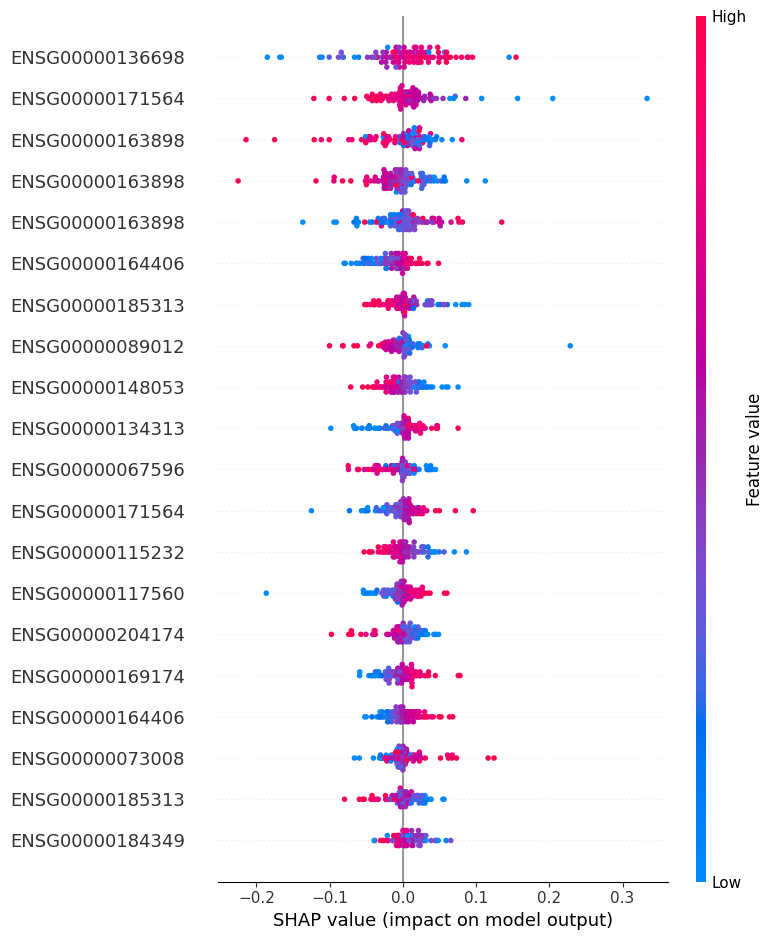

In [60]:
# Before converting to NumPy:
real_feature_names = X.columns.tolist()

# After, when you use SHAP:
shap.summary_plot(shap_values_main, X_test_combined[:100], feature_names=real_feature_names)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.11/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Raw SHAP values type: <class 'numpy.ndarray'>
Raw SHAP values shape: (100, 175, 1)
Final SHAP Values shape: (100, 175)
X_test_combined shape: (100, 175)


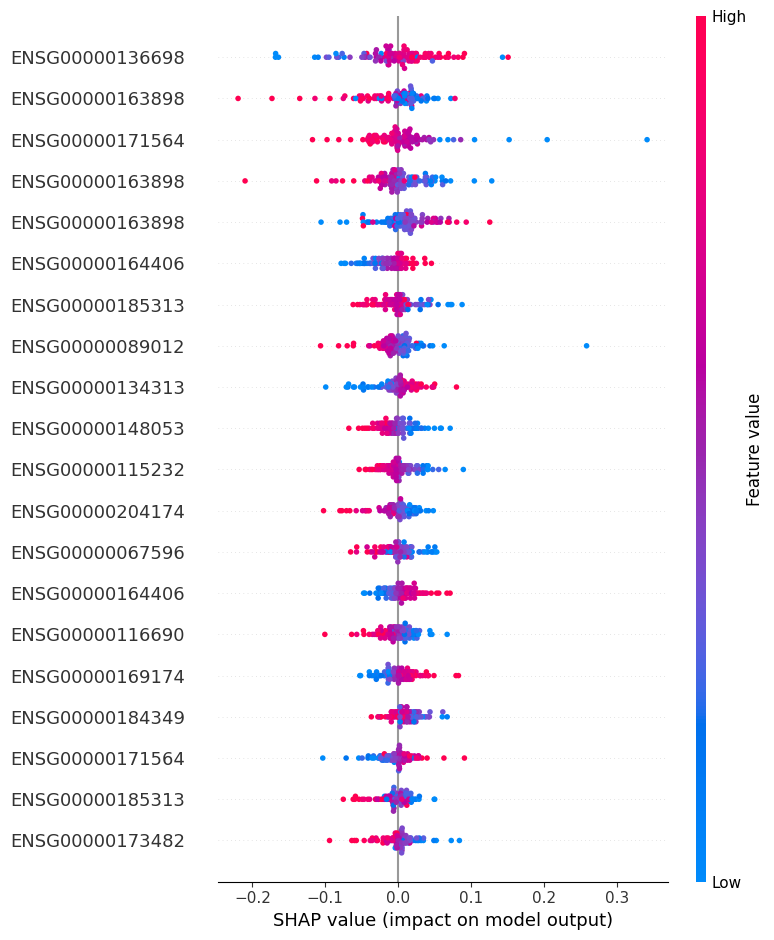

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1098,)  and requested shape (175,)

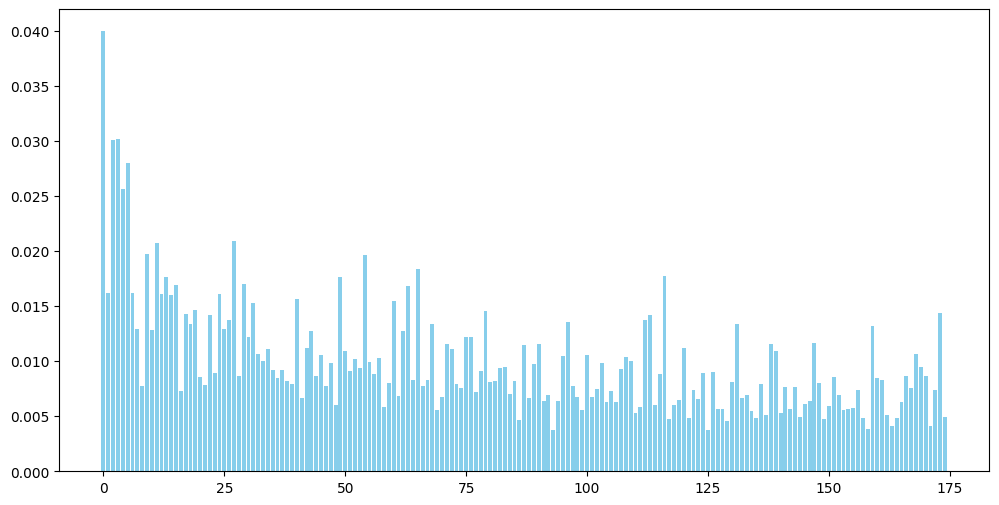

In [61]:
real_feature_names = X.columns.tolist()
import shap
import matplotlib.pyplot as plt
import numpy as np

# ------------------ SHAP Explainer Setup ------------------

# Background dataset for DeepExplainer
background = X_train_combined[np.random.choice(X_train_combined.shape[0], 100, replace=False)]

# Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Compute SHAP values for 100 samples
shap_values = explainer.shap_values(X_test_combined[:100])

# ------------------ SHAP Value Handling ------------------

# Inspect and squeeze properly
print(f"Raw SHAP values type: {type(shap_values)}")
print(f"Raw SHAP values shape: {shap_values.shape}")

# Squeeze last dimension
shap_values_main = np.squeeze(shap_values)
print(f"Final SHAP Values shape: {shap_values_main.shape}")
print(f"X_test_combined shape: {X_test_combined[:100].shape}")

# ------------------ SHAP Visualization ------------------

# Replace 'feature_names' with actual column names
shap.summary_plot(shap_values_main, X_test_combined[:100], feature_names=real_feature_names)

# Optional: Bar plot with real feature names
mean_abs_shap = np.abs(shap_values_main).mean(axis=0)
plt.figure(figsize=(12, 6))
plt.bar(range(X_test_combined.shape[1]), mean_abs_shap, tick_label=real_feature_names, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mean SHAP Value (Importance)')
plt.title('Feature Importance (Mean SHAP Values)')
plt.xticks(rotation=90)
plt.show()



In [30]:
!pip install shap


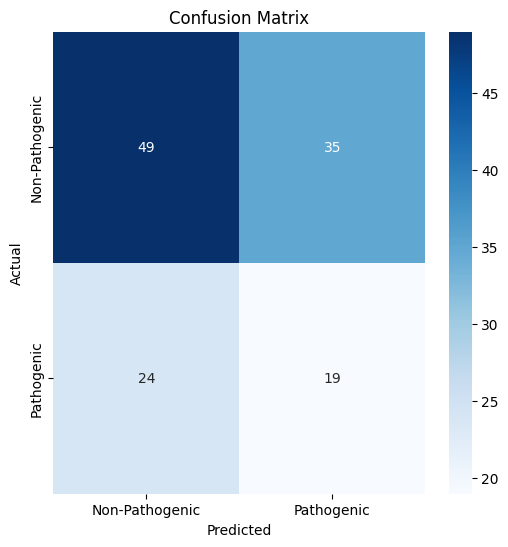

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Pathogenic', 'Pathogenic'],
            yticklabels=['Non-Pathogenic', 'Pathogenic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
import matplotlib.pyplot as plt
import numpy as np

features = ['Ligand A Binding Affinity', 'Receptor Expression', 'Molecular Weight', ...]  # Replace with your feature names
importance = [0.25, 0.18, 0.15, ...]  # Replace with your feature importances
indices = np.argsort(importance)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

TypeError: '<' not supported between instances of 'ellipsis' and 'float'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'F1 Score', 'AUC-ROC']
values = [0.59, 0.54, 0.623] # Replace with your actual values
colors=['#4285F4', '#DB4437', '#F4B400']

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=colors) # Use a visually appealing color scheme
plt.ylim(0, 1) # Set the y-axis limit to 0-1 for better comparison
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(X[X.columns.to_list()], kde=True)
plt.xlabel('Communication Score')
plt.ylabel('Density')
plt.title('Distribution of Communication Scores')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
len(X_train[0])

In [ ]:
len(model.layers[0].weights[0].numpy())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_first_layer_weights(model, feature_names=None):
    """
    Visualizes the weights of the first layer of a Keras model as a bar plot,
    showing the importance of each input feature.

    Args:
        model: A trained Keras model.
        feature_names: A list of feature names (strings). If None, feature indices are used.
    """
    try:
        first_layer = model.layers[0]
        weights = first_layer.get_weights()[0]  # Get the weights matrix
        if len(weights.shape) > 2: # Check for convolutional layer
            print("Warning: First layer is a convolutional layer. Visualizing flattened weights.")
            weights = weights.reshape(weights.shape[0]*weights.shape[1]*weights.shape[2], weights.shape[3]) #flatten convolved weights.
        if len(weights.shape) > 1:
            weights = np.mean(weights, axis=1) # Average weights if multiple neurons

        num_features = weights.shape[0]

        if feature_names is None:
            feature_names = [f"Feature {i}" for i in range(num_features)]
        elif len(feature_names) != num_features:
            raise ValueError("Number of feature names must match the number of input features.")

        plt.figure(figsize=(10, 6))
        plt.bar(feature_names, weights)
        plt.xlabel("Features")
        plt.ylabel("Weight Magnitude")
        plt.title("First Layer Weights (Feature Importance)")
        plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
        plt.tight_layout()
        plt.show()

    except IndexError:
        print("Error: Model does not have a first layer with weights (e.g., input layer).")
    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

feature_names = X.columns.to_list()
visualize_first_layer_weights(model, feature_names)

In [ ]:
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, _ = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic ROC (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import AdamW
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.utils.class_weight import compute_class_weight

# #  Apply SMOTE to balance the dataset
# X_train, y_train = smote.fit_resample(X_train, y_train)

#  #Scale the training and test data (avoid data leakage)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)  # No fit_transform() here!

# # Compute class weights for imbalanced datasets
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))

# #  Define the improved neural network
# model = Sequential([
#     Dense(512, activation='relu', input_shape=(1098,)),
#     BatchNormalization(),
#     Dropout(0.2),

#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.2),

#     Dense(100, activation='relu'),
#     BatchNormalization(),

#     Dense(1, activation='sigmoid')  # Binary classification: Use sigmoid instead of softmax
# ])

# #  Compile the model with AdamW optimizer
# model.compile(optimizer=AdamW(learning_rate=0.0005, weight_decay=1e-4),
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy'])

# #  Set early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# #  Train the model
# history = model.fit(X_train, y_train,
#                     epochs=50,
#                     batch_size=32,
#                     validation_data=(X_test, y_test),
#                     callbacks=[early_stopping],
#                     class_weight=class_weight_dict)  # Apply class weighting

# # #  Evaluate the model
# # test_loss, test_acc = model.evaluate(X_test, y_test)
# # print(f'\n Final Test Accuracy: {test_acc:.4f}')

# y_pred=model.predict(X_test_combined) #probability outputed
# y_pred=(y_pred>0.5).astype(int) #binarizes the outcome

# # Final test set evaluation
# print(f"Test Accuracy: {accuracy_score(y_test,y_pred):.4f}")
# print(f" F1 Score (Weighted): {f1_score(y_test,y_pred):.4f}\n")
# print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred):.4f}\n")




In [ ]:
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, _ = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic ROC (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, _ = roc_curve(y_test, y_val_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic ROC (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy
# from sklearn.utils.class_weight import compute_class_weight
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# X_train_combined = X_train
# X_test_combined = X_test
# # Compute class weights for imbalance
# class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))

# # Create a simpler model with fewer layers and neurons
# model = Sequential([
#     Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5), input_shape=(X_train_combined.shape[1],)),
#     BatchNormalization(),
#     Dropout(0.2),

#     Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
#     BatchNormalization(),
#     Dropout(0.2),

#     Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
#     Dropout(0.2),

#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# # Compile the model with Adam optimizer and a higher learning rate
# model.compile(optimizer=Adam(learning_rate=0.001),  # Adjusted learning rate
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy'])

# # Cross-validation setup
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Track metrics for each fold
# precisions = []
# recalls = []
# f1_scores = []
# roc_aucs = []

# # Cross-validation loop
# for train_index, val_index in kf.split(X_train_combined, y_train):
#     X_train_fold, X_val_fold = X_train_combined[train_index], X_train_combined[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     # Train the model
#     model.fit(X_train_fold, y_train_fold,
#               epochs=30,  # Reduced number of epochs for quicker training
#               batch_size=32,  # Increased batch size for stability
#               validation_data=(X_val_fold, y_val_fold),
#               class_weight=class_weight_dict,
#               verbose=0)  # Silence training output for brevity

#     # Predict on the validation set
#     y_val_pred = model.predict(X_val_fold)
#     y_val_pred = (y_val_pred > 0.5).astype(int)  # Binarize predictions

#     # Compute metrics
#     precisions.append(precision_score(y_val_fold, y_val_pred))
#     recalls.append(recall_score(y_val_fold, y_val_pred))
#     f1_scores.append(f1_score(y_val_fold, y_val_pred))
#     roc_aucs.append(roc_auc_score(y_val_fold, y_val_pred))

# # Average metrics across all folds
# print(f"Average Precision: {np.mean(precisions):.4f}")
# print(f"Average Recall: {np.mean(recalls):.4f}")
# print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
# print(f"Average AUC-ROC: {np.mean(roc_aucs):.4f}")

# # Final test set evaluation
# test_loss, test_acc = model.evaluate(X_test_combined, y_test)
# print(f"Test Accuracy: {test_acc:.4f}")

# # Test metrics
# y_test_pred = model.predict(X_test_combined)
# y_test_pred = (y_test_pred > 0.5).astype(int)
# print(f"Test Precision: {precision_score(y_test, y_test_pred):.4f}")
# print(f"Test Recall: {recall_score(y_test, y_test_pred):.4f}")
# print(f"Test F1 Score: {f1_score(y_test, y_test_pred):.4f}")
# print(f"Test AUC-ROC: {roc_auc_score(y_test, y_test_pred):.4f}")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping

# Preprocessing
X_train = X_train  # Assuming you've already applied SMOTE
X_test = X_test  # Assuming no need to apply SMOTE on test set
y_train = y_train
y_test = y_test

# Compute class weights for imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Adding more layers and experimenting with parameters
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),  # Increase dropout rate

    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile with learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Early stopping to halt training when no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Track metrics for each fold
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Cross-validation loop
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold,
              epochs=50,
              batch_size=32,  # Changed batch size
              validation_data=(X_val_fold, y_val_fold),
              class_weight=class_weight_dict,
              verbose=0,  # Silence training output for brevity
              callbacks=[early_stopping])

    # Predict on the validation set
    y_val_pred = model.predict(X_val_fold)
    y_val_pred = (y_val_pred > 0.5).astype(int)

    # Compute metrics
    precisions.append(precision_score(y_val_fold, y_val_pred))
    recalls.append(recall_score(y_val_fold, y_val_pred))
    f1_scores.append(f1_score(y_val_fold, y_val_pred))
    roc_aucs.append(roc_auc_score(y_val_fold, y_val_pred))

# Average metrics across all folds
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average AUC-ROC: {np.mean(roc_aucs):.4f}")

# Final test set evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_val_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()